## 影像處理與機器人視覺: 基礎設計HW # 2

In [1]:
import numpy as np
import cv2
from numpy.linalg import inv
from matplotlib import pyplot as plt

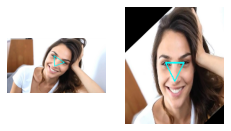

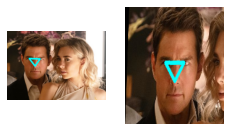

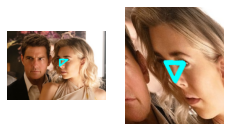

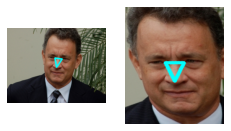

In [4]:
img=cv2.imread('./img1.jpg')
x_vaule=[]
y_vaule=[]
def on_EVENT_LBUTTONDOWN(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDOWN:
        xy="%d,%d" % (x,y)
        x_vaule.append(x)
        y_vaule.append(y)
        cv2.circle(img,(x,y),1,(255,0,0),thickness=-1)
        cv2.imshow(img)

def affine_processing(img_path,x_vaule,y_vaule):
    img=cv2.imread(img_path)
    width, high, channel= img.shape
    #若有3個點則可以affine
    if len(x_vaule)==3 or (y_vaule)==3:
        #來源影像(眼睛左、眼睛右、鼻子)
        srouce_par=np.float32([[x_vaule[0],y_vaule[0]],[x_vaule[1],y_vaule[1]],[x_vaule[2],y_vaule[2]]])
        #畫圖
        cv2.polylines(img, [srouce_par.astype(int)], True, (255, 255, 0), 8)
        #固定位置的template 
        destination_par=np.float32([[65,90],[95,90],[80,120]])
        #affine 矩陣
        affine_martix=cv2.getAffineTransform(srouce_par,destination_par)
        #affine結果
        affine_result=cv2.warpAffine(img,affine_martix,(160,190))

        
        plt.subplot(131)
        plt.imshow(img[:,:,::-1])
        plt.axis('off')
        plt.subplot(132)
        plt.imshow(affine_result[:,:,::-1])
        plt.axis('off')
        # plt.subplot(133)
        # plt.imshow(inverse_affine_result[:,:,::-1])
        # plt.axis('off')
        plt.show()
    else:
        print("error")
affine_processing('./img1.jpg',[649,790,655],[256,349,399])

affine_processing('./img2.jpg',[119,177,150],[152,154,192])

affine_processing('./img2.jpg',[283,325,283],[157,158,191])

affine_processing('./img3.jpg',[276,317,285],[173,179,226])

In [29]:
def warpAffine(img,affine_martix,width,high,channel):
    srouce_y,srouce_x=np.indices(img.shape[:2])
    srouce_points=np.stack((srouce_x.ravel(),srouce_y.ravel(),np.ones(srouce_y.size))).astype(int)
    destination_points=np.round(np.dot(affine_martix,srouce_points)).astype(int)
    #建立相同大小空矩陣
    img_martix=np.zeros([width,high,channel])
    #矩陣維度,矩陣元素
    dimension,element=destination_points.shape
    for i in range(3):
        for j in range(element):
            destination_1,destination_2=destination_points[0,j],destination_points[1,j]
            srouce_1,srouce_2=srouce_points[0,j],srouce_points[1,j]
            if 0<destination_1<high and 0<=destination_2<width:
                img_martix[destination_2,destination_1,i]=img[srouce_2,srouce_1,i]
    affine_result=img_martix.astype(int)
    return affine_result

def affine_processing(img_path,x_vaule,y_vaule):
    img=cv2.imread(img_path)
    width, high, channel= img.shape
    #若有3個點則可以affine
    if len(x_vaule)==3 or (y_vaule)==3:
        #來源影像(眼睛左、眼睛右、鼻子)
        srouce_par=np.float32([[x_vaule[0],y_vaule[0]],[x_vaule[1],y_vaule[1]],[x_vaule[2],y_vaule[2]]])
        #畫圖
        # cv2.polylines(img, [srouce_par.astype(int)], True, (255, 255, 0), 8)
        cv2.circle(img,(x_vaule[0], y_vaule[0]), 6, (255, 255, 0), -1)
        cv2.circle(img,(x_vaule[1], y_vaule[1]), 6, (255, 255, 0), -1)
        cv2.circle(img,(x_vaule[2], y_vaule[2]), 6, (255, 255, 0), -1)


        #固定位置的template 
        destination_par=np.float32([[65,90],[95,90],[80,120]])
        #affine 矩陣
        affine_martix=cv2.getAffineTransform(srouce_par,destination_par)
        #affine結果
        # affine_result=cv2.warpAffine(img,affine_martix,(160,190))
        
        #取代cv的warp
        affine_result=warpAffine(img,affine_martix,160,190,3)
        



        
        plt.subplot(131)
        plt.imshow(img[:,:,::-1])
        plt.axis('off')
        plt.subplot(132)
        plt.imshow(affine_result[:,:,::-1])
        plt.axis('off')
        plt.show()
    else:
        print("error")

(2, 1049088)


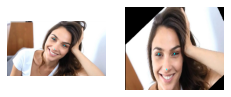

(2, 198594)


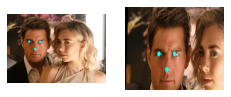

(2, 198594)


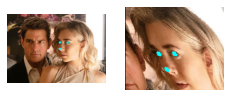

(2, 246810)


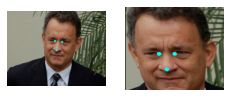

In [30]:
affine_processing('./img1.jpg',[649,790,655],[256,349,399])

affine_processing('./img2.jpg',[119,177,150],[152,154,192])

affine_processing('./img2.jpg',[283,325,283],[157,158,191])

affine_processing('./img3.jpg',[276,317,285],[173,179,226])